In [50]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib.animation as animation
import glob, re, os

import scienceplots
plt.style.use('default')
plt.style.use(['science', 'high-vis', 'grid'])

In [51]:
DIR = "../build/results/thread_0/"

In [52]:
list_doping_files = glob.glob(DIR + "doping*.csv")
# Sort the files by the time creation in unix time using os.path.getmtime
list_doping_files.sort(key=os.path.getmtime)


 251/252

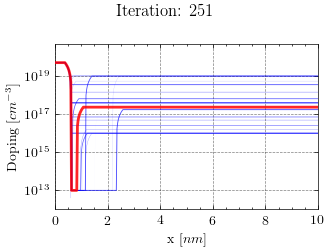

In [27]:
# Preload the data
x_list = []
all_doping = []

for file in list_doping_files:
    x, acceptor, donor, doping = np.loadtxt(file, delimiter=',', unpack=True, skiprows=1)
    x_list.append(x)
    all_doping.append(np.abs(doping))

# Annimate the doping profile
fig, ax = plt.subplots()
ax.set_xlabel("x $[nm]$")
ax.set_ylabel("Doping $[cm^{-3}]$")
# ax.set_title("Iteration: 0")
ax.set_yscale('log')
ax.set_ylim(1e12, 5e20)
ax.set_xlim(0, 10)
fig.suptitle("Iteration: 0")

fig.tight_layout()

# Animate the doping profile. We show the N lasts iteration of the doping profile, with alpha decreasing from 1 to 0

N = 25
lines = [ax.plot([], [], alpha=1 - i/N, ls="-", c="b")[0] for i in range(N)]

def init():
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    print(f"\r {i}/{len(list_doping_files)}", end="", flush=True)
    for k in range(1, N):
        if i - k >= 0:
            lines[k].set_data(x_list[i-k], all_doping[i-k])
            lines[k].set_alpha(0.7*(1 - (k/N)**2))
            lines[k].set_linewidth(0.7*(1 - k/N))
            lines[k].set_zorder(9 - k)
    lines[0].set_data(x_list[i], all_doping[i])
    lines[0].set_linewidth(2)
    lines[0].set_alpha(0.85)
    lines[0].set_zorder(9)
    lines[0].set_color("r")
    fig.suptitle("Iteration: {}".format(i))
    return lines

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(list_doping_files), interval=100, blit=True)
anim.save('doping_profile.mp4', fps=5, extra_args=['-vcodec', 'libx264'], dpi=300)

In [53]:
file_hist = DIR + "history_optimization.csv"
data = np.loadtxt(file_hist, delimiter=',', unpack=True, skiprows=1)

In [54]:
iteration,cost,temperature = data[0], data[1], data[2]
# Make the cost function always positive
if np.min(cost) < 0:
    cost = cost - np.min(cost) + 1

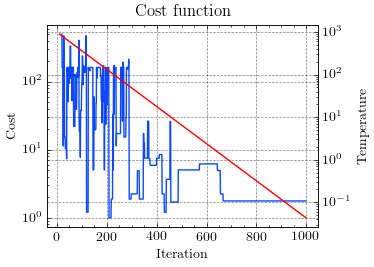

In [58]:
# Plot the cost function
fig, ax = plt.subplots()
ax.set_xlabel("Iteration")
ax.set_ylabel("Cost")
ax.set_title("Cost function")
ax.plot(iteration[20:], cost[20:], '-')
ax.set_yscale('log')
axTemp = ax.twinx()
axTemp.set_ylabel("Temperature")
axTemp.set_yscale('log')
axTemp.plot(iteration[10:], temperature[10:], '-', color='red')


In [59]:
file_path = "../build/optim_path_full.csv"
BV,BrP,DW = np.loadtxt(file_path, delimiter=',', unpack=True, skiprows=1)

N = len(BV)
iterations = np.arange(N)

fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].set_ylabel("BV")
ax[0].plot(iterations, BV, '-')
ax[1].set_ylabel("BrP")
ax[1].plot(iterations, BrP, '-')
ax[2].set_ylabel("DW")
ax[2].plot(iterations, DW, '-')
ax[2].set_xlabel("Iteration")

plt.show()


ValueError: could not convert string to float: 'BV'